In [4]:
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
import tensorflow as tf
import pathlib
#pip install --upgrade protobuf

import cv2
cap = cv2.VideoCapture(0)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings
%matplotlib inline
#plt.figure(figsize=(20,20))
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging
#import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
#pip install tf_slim

ModuleNotFoundError: No module named 'official'

<Figure size 1332x756 with 0 Axes>

In [ ]:
pip install tf-models-official

In [3]:

## code to load the custom trained model...

# path to the saved model....
saved_path = 'C:/TensorFlow/workspace/training_demo/exported-models/my_model/saved_model'
print('Loading model...', end='')
start_time = time.time()

#loading the model....
detect_fn = tf.saved_model.load(saved_path)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))


Loading model...Done! Took 20.351659059524536 seconds


In [2]:
# Load the labels....
# use the below code if need to download the label file from the website directly
# Download labels file
# def download_labels(filename):
#     base_url = '<include the url>' # PATH OF THE label_map.pb_txt
#     label_dir = tf.keras.utils.get_file(fname=filename,
#                                         origin=base_url + filename,
#                                         untar=False)
#     label_dir = pathlib.Path(label_dir)
#     return str(label_dir)

LABEL_FILENAME = 'label_map.pbtxt'
PATH_TO_LABELS = 'C:/TensorFlow/workspace/training_demo/annotations/label_map.pbtxt'

In [3]:
# Path to the image to be checked....

IMAGE_PATHS = ['C:/TensorFlow/workspace/training_demo/images/test/tape170.jpg','C:/TensorFlow/workspace/training_demo/images/test/tape176.jpg']

In [4]:
# loading label map data for plotting....

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

Running inference for C:/TensorFlow/workspace/training_demo/images/test/tape170.jpg... Done
100
Running inference for C:/TensorFlow/workspace/training_demo/images/test/tape176.jpg... Done
100


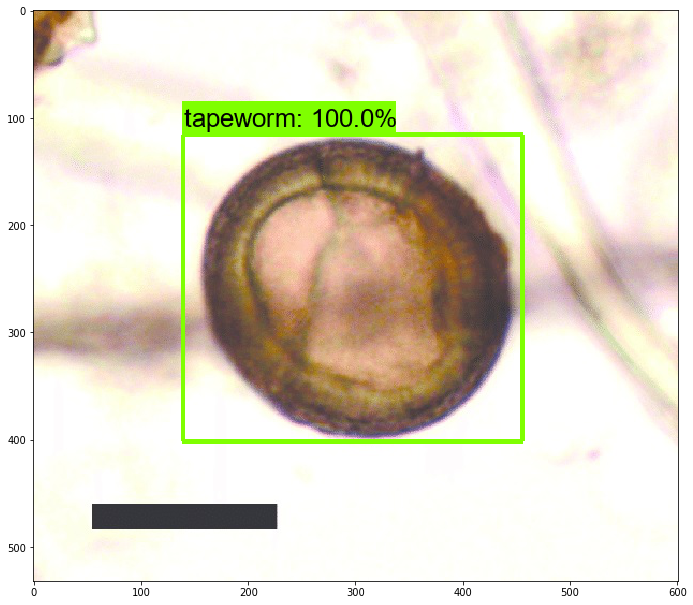

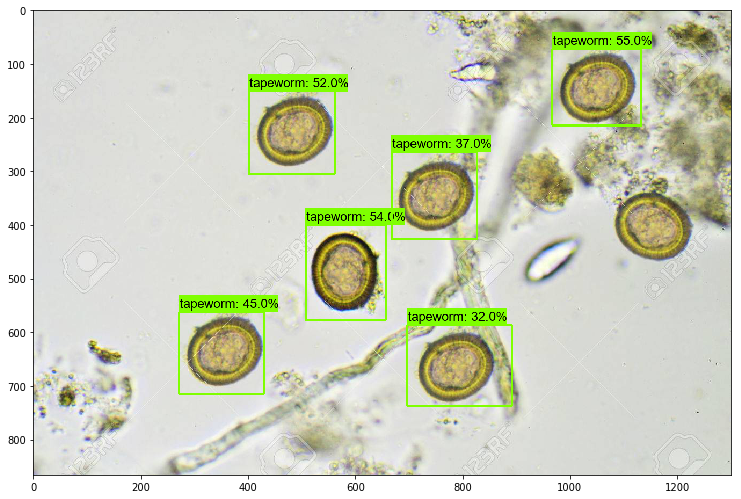

In [23]:
# finally testing everything.... for an image....
IMAGE_SIZE=(12.5, 10.5)

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))


for image_path in IMAGE_PATHS:

    print('Running inference for {}... '.format(image_path), end='')

    image_np = load_image_into_numpy_array(image_path)

    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=.30,
          agnostic_mode=False)

    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np_with_detections)
    print('Done')
    print((detections['num_detections']))
fig = plt.gcf()
#fig.set_size_inches(18.5, 10.5)
plt.show()


In [2]:
# To test the webcam aspect....
# 1. lOADING THE MODEL.......

# DEFINING THE PATHS
PATH_TO_CFG = 'C:/TensorFlow/workspace/training_demo/exported-models/my_model/pipeline.config'
PATH_TO_CKPT = 'C:/TensorFlow/workspace/training_demo/exported-models/my_model/checkpoint/'



tf.get_logger().setLevel('ERROR')           # Suppress TensorFlow logging (2)

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(PATH_TO_CFG)
model_config = configs['model']
detection_model = model_builder.build(model_config=model_config, is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(PATH_TO_CKPT, 'ckpt-0')).expect_partial()

@tf.function
def detect_fn(image):
    """Detect objects in image."""

    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)

    return detections, prediction_dict, tf.reshape(shapes, [-1])

NameError: name 'model_builder' is not defined

In [6]:
# LOADING THE label map data ...


category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

In [8]:
# Calling the entire function.... for 

import numpy as np

while True:
    # Read frame from camera
    ret, image_np = cap.read()

    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)

    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections, predictions_dict, shapes = detect_fn(input_tensor)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'][0].numpy(),
          (detections['detection_classes'][0].numpy() + label_id_offset).astype(int),
          detections['detection_scores'][0].numpy(),
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=.30,
          agnostic_mode=False)

    # Display output
    cv2.imshow('object detection', cv2.resize(image_np_with_detections, (800, 600)))

    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

ValueError: Python inputs incompatible with input_signature:
  inputs: (
    tf.Tensor(
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]], shape=(1, 480, 640, 3), dtype=float32))
  input_signature: (
    TensorSpec(shape=(1, None, None, 3), dtype=tf.uint8, name='input_tensor'))

In [5]:
# for video sourcing....
# open the video file....

video = cv2.VideoCapture('C:/TensorFlow/workspace/training_demo/video/new1.mp4')


while (video.isOpened):
    # Read frame from camera
    ret, image_np = video.read()

    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)

    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections, predictions_dict, shapes = detect_fn(input_tensor)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'][0].numpy(),
          (detections['detection_classes'][0].numpy() + label_id_offset).astype(int),
          detections['detection_scores'][0].numpy(),
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=.30,
          agnostic_mode=False)

    # Display output
    cv2.imshow('object detection', cv2.resize(image_np_with_detections, (800, 600)))

    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

        
# cleanup
video.release()
cv2.destroyAllWindows()

NameError: name 'detect_fn' is not defined

In [ ]:
# 